# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **
        Regression is used to predict continuous variables, and classification is used to predict discrete values. In this particular problem, we have data points where we need to predict if the given data point belongs to a particular class: need intervention, no need to intervention. Therefore, this is a classification problem.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


In [2]:
%qtconsole

### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).

In [3]:
# TODO: Calculate number of students
n_students = len(student_data)

# TODO: Calculate number of features
n_features = len(student_data.columns[:-1])

# TODO: Calculate passing students
n_passed = len(student_data[student_data.passed == 'yes'])

# TODO: Calculate failing students
n_failed = len(student_data[student_data.passed == 'no'])

# TODO: Calculate graduation rate
grad_rate = round(float(len(student_data[student_data.passed == 'yes']))/float(len(student_data)) * 100, 2)

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [4]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [5]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)
  
    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [7]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_test, X_train, y_test, y_train = train_test_split(X_all, y_all, test_size=num_train, train_size=num_test, random_state=42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

**Answer: **

** Neural network models (Multi-layer Perceptron)**$^{[1]}$: 


General Ideal of Multi-Layer Perceptrons (MPL): 

Multi-Layer Perceptrons (MPLs) belong to supervised feed-forward networks. MPL arrange processing elements (PE) in a multilayered structure where the input of each PE ($x_{i}$) from the previous layer is multiply by connection weight ($w_{i}$). PE summed weighted data ($\sum{x_{i}w_{i}}$), and add or subtract a biased or threshold value ($z=\sum{x_{i}w_{i}} + \theta$). Then these summed values pass through a non-linear transfer function (we use a sigmoid) to produce the output of the PE ($a=f(z)$). The output from one PE is input to another PE in the next layer. The global error ($E$) between the output predicted by the network and the desired output is calculated using an error function. The error function for given node ($i$) is calculated using,

$E = \frac{1}{2}\sum({\hat{y}_{i} - y_{i}})^{2}$

$\hat{y}$ - Predicted value by the network, $y_{i}$ - Expected value (from training data)

The objective of the learning process is to minimize the error between the predicted and actual outputs. The error function usually achieves minimization process on variables in the network, one of the common variable in the network is its connection weights. This minimization process used the back-propagation algorithm to adjust the weights. Gradient descent technique is being used to calculate the desired weights in the trained network. The global error is minimized by modifying the weights using the following equation:

$\Delta{w_{ij}} = -\eta \frac{\partial{E}}{\partial{w_{ij}}}$


$\Delta{w_{ij}}$ - weight increment from node $i\rightarrow j$, $\eta$ - learning rate


the weights are then updated by adding the delta weight, to the corresponding previous weights as follows,

$w_{ij}(n+1) = w_{ij}(n) + \Delta{w_{ij}}(n+1)$

Weights between the hidden layer and the output layer are adjusted first, followed by the weights between the hidden layer and the input layer. This process is repeated and obtain weights that have the global minimum error in the network. Once these desired weights are achieved, the neural network is trained and can be deploy and use in practice. 

*Strengths*:
ANN determine complicated relationships between input and output data sets. ANN are one of the modeling techniques that attempt to simulate the operation fo the human brain and nervous system. ANN models easy to understand compare to statistical models. ANN with Back propagation learning algorithm is widely used in solving various classification and forecasting problems. Even though back propagation convergence is slow but it is guaranteed


*Weaknesses*:
There are many shortcomings can be identified in MPLs. For example, MPLs can be trapped in a **local minimum** when they try to find a global minimum. Gradient descent algorithm is trying to determine the minimum value of the given weights cumulatively. Having to have a non-convex behavior of the error surface, the gradient descent can identify a minimum value which may be not the global minimum. There are a couple of different ways we can escape this local mimima, including increasing the learning rate, adding momentum terms, adding a small amount of random noise to the input patterns to shake the network from the line of steepest decent. Adding more hidden nodes and relocating the network along the error surface by randomizing the initial weights and retraining. Another limitation of MPLs is that feed-forward neural networks that are trained and stored weights during the training process is hard to interpret. The relationship between the input and output is a **black box** in these networks, and therefore it is hard to quantify them.

*General Applications*:
ANNs can examine a large number of information quickly and sort it all out; they can be used in various complicated application such as stock market prediction, Medicine, Electronic Noise, Security and financial application.


**Decision Tree Classifier**$^{[2]}$


Classification is an important problem in the field of data mining. The decision tree models are found to be the most useful in the domain of data mining since they obtain reasonable accuracy and they are relatively inexpensive to the computer. Most DT classifiers perform classification in two phases: Tree Building and Tree Pruning. In tree building, the decision tree model is built by recursively splitting the training data set based on a locally optimal criterion until all or most of the records belonging to each of the partitions bear the same class label. 
There are two main operations during tree building. 
- (i) Evaluation of splits for each attribute and selection of the best split. 
- (ii) Creation of partition using best split. Several splitting schemes.

The complexity of creation of DT lies in determining the best split for each attribute. There are several splitting schemes have been proposed in the literature; however, the most common scheme is the Entropy. The information gain in each node can be calculated using entropy of that location using following formulas. 

$Entropy(S) = -\sum_{j = 1}^{m}{P_{j}log{P_{j}}}$

where $P_{j}$ is the relative frequency of class $j$ in $S$ (data)

$Gain(S, A) = Entropy(S) - \sum_{v\in A} \big(\frac{|S_{v}|}{|S|} \times Entropy(S_{v})\big)$

where $A$ attribute, $v$ possible values for attribute $A$, $S_{v}\subset S$, $|S_{v}|$ number of elements in $S_{v}$ 

The maximum information gain in for identified attribute uses to proceed the splitting at the given node. By reapeating this method decision tree can be constructed. 


*Strengths*:
There are many advantages of using DT algorithm in classification. Unlike ANNs, mainly they are simple to understand and interpret. This allows us to describe a situation and preferences for outcomes. DTs are also authorized to add new possible scenarios, and this makes it possible to determine worst, best and expected values for different cases. DTs are also allowed to combine with other decision techniques.

*Weaknesses*:
one of the major weakness of DTs is the calculations can be complicated particularly if many values are uncertain and if many outcomes are linked. For data including categorical variables with a different number of levels, information gain in decision trees are biased in favor of those attributes with more levels.


**GaussianNB**

Bayesian classifiers are based on Bayes’ theorem. Bayes' theorem state that the probability that we want to compute P(A|B) can be express in terms of probabilities P(A), P(B|A) and P(B).

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

Naive Bayesian classifiers assume that the effect of an attribute value on a given class is independent of the values of the other attributes. This assumption is called class conditional independence. It is made to simplify the computation involved and, in this sense, is considered ”naive”.


Some of the typical application for Naive Bayes classifier are credit approval, target marketing, spam filtering, medical diagnostics. 


*Strengths*:
Comparing classification algorithms have found that the
naive Bayesian classifier to be comparable in performance with a decision tree and selected neural network classifiers. Bayesian classifiers have also exhibited high accuracy and speed
when applied to large databases. 


*Weaknesses*:
The assumption of class condition independence, therefore loss of accuracy. In practically, dependencies exists among variables cannot be modeled by the naive bayesian classifier. 




**Bibliography**

[1] "Applications of Artificial Neural Networks in Foundation ..." N.p., n.d. Web. 14 Oct. 2016 https://www.researchgate.net/profile/Mark_Jaksa/publication/228649194_Application

[2] Privacy-Preserving Decision Tree Classi?cation Over ... (n.d.). Retrieved from http://iceb.nccu.edu.tw/proceedings/2005/470-476.pdf

[3] Updating formulate and a pairwise algorithem for computing sample variace
http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf

Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [8]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)
    return round((end - start), 2)
    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return round((end - start), 4), round(f1_score(target.values, y_pred, pos_label='yes'), 4)


def train_predict(clf, X_train, y_train, X_test, y_test, row):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    row['records'] = int(len(X_train))
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    row['train_time'] = train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    
    ptrain_time, f1_train = predict_labels(clf, X_train, y_train)
    row['ptrain_time'] = ptrain_time
    row['f1_train'] = f1_train
    
    print "F1 score for training set: {:.4f}.".format(f1_train)
    ptest_time, f1_test = predict_labels(clf, X_test, y_test)
    row['ptest_time'] = ptest_time
    row['f1_test'] = f1_test
    
    print "F1 score for test set: {:.4f}.".format(f1_test)
    return row

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [10]:
# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB


# TODO: Initialize the three models
clf_A = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100, 100), random_state=1)
clf_B = DecisionTreeClassifier(random_state=0)
clf_C = GaussianNB()

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)
clf = [clf_A, clf_B, clf_C]
tabledf = pd.DataFrame(columns=['clf', 'records', 'train_time', 'ptrain_time', 'f1_train', 'ptest_time', 'f1_test'])

for c in clf:
    for i in range(0, 3):
        row = {}
        row['clf'] = c.__class__.__name__
        row = train_predict(c, X_train[:(i + 1) * 100], y_train[:(i + 1) * 100] , X_test, y_test, row)
        tabledf = tabledf.append(row, ignore_index=True)
        print '----'

m = tabledf[tabledf.clf == 'MLPClassifier']
D = tabledf[tabledf.clf == 'DecisionTreeClassifier']
G = tabledf[tabledf.clf == 'GaussianNB']



Training a MLPClassifier using a training set size of 100. . .
Trained model in 0.0118 seconds
Made predictions in 0.0005 seconds.
F1 score for training set: 0.7853.
Made predictions in 0.0005 seconds.
F1 score for test set: 0.7949.
----
Training a MLPClassifier using a training set size of 200. . .
Trained model in 0.0318 seconds
Made predictions in 0.0021 seconds.
F1 score for training set: 0.7840.
Made predictions in 0.0027 seconds.
F1 score for test set: 0.7949.
----
Training a MLPClassifier using a training set size of 300. . .
Trained model in 0.7425 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9975.
Made predictions in 0.0005 seconds.
F1 score for test set: 0.7576.
----
Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0008 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.7188.
----
Training a DecisionTreeClassifier using

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - MLPClassifier**


| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| {{int(m[m.records==100]['records'][0])}}              |        {{round(m[m.records==100]['ptrain_time'][0], 4)}}           |          {{round(m[m.records==100]['ptest_time'][0], 4)}}        |    {{round(m[m.records==100]['f1_train'][0], 4)}}       |     {{round(m[m.records==100]['f1_test'][0], 4)}}    |
| {{int(m[m.records==200]['records'][1])}}              |        {{round(m[m.records==200]['ptrain_time'][1], 4)}}           |          {{round(m[m.records==200]['ptest_time'][1], 4)}}        |    {{round(m[m.records==200]['f1_train'][1], 4)}}       |     {{round(m[m.records==200]['f1_test'][1], 4)}}    |
| {{int(m[m.records==300]['records'][2])}}              |        {{round(m[m.records==300]['ptrain_time'][2], 4)}}           |          {{round(m[m.records==300]['ptest_time'][2], 4)}}        |    {{round(m[m.records==300]['f1_train'][2], 4)}}       |     {{round(m[m.records==300]['f1_test'][2], 4)}}    |


** Classifer 2 - DecisionTreeClassifier**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| {{int(D[D.records==100]['records'][3])}}              |        {{round(D[D.records==100]['ptrain_time'][3], 4)}}           |          {{round(D[D.records==100]['ptest_time'][3], 4)}}        |    {{round(D[D.records==100]['f1_train'][3], 4)}}        |     {{round(D[D.records==100]['f1_test'][3], 4)}}      |
| {{int(D[D.records==200]['records'][4])}}              |        {{round(D[D.records==200]['ptrain_time'][4], 4)}}           |          {{round(D[D.records==200]['ptest_time'][4], 4)}}        |    {{round(D[D.records==200]['f1_train'][4], 4)}}       |     {{round(D[D.records==200]['f1_test'][4], 4)}}      |
| {{int(D[D.records==300]['records'][5])}}              |        {{round(D[D.records==300]['ptrain_time'][5], 4)}}           |          {{round(D[D.records==300]['ptest_time'][5], 4)}}        |    {{round(D[D.records==300]['f1_train'][5], 4)}}       |     {{round(D[D.records==300]['f1_test'][5], 4)}}      |

** Classifer 3 - GaussianNB**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| {{int(G[G.records==100]['records'][6])}}              |        {{round(G[G.records==100]['ptrain_time'][6], 4)}}           |          {{round(G[G.records==100]['ptest_time'][6], 4)}}        |    {{round(G[G.records==100]['f1_train'][6], 4)}}       |     {{round(G[G.records==100]['f1_test'][6], 4)}}      |
| {{int(G[G.records==200]['records'][7])}}              |        {{round(G[G.records==200]['ptrain_time'][7], 4)}}           |          {{round(G[G.records==200]['ptest_time'][7], 4)}}        |    {{round(G[G.records==200]['f1_train'][7], 4)}}       |     {{round(G[G.records==200]['f1_test'][7], 4)}}      |
| {{int(G[G.records==300]['records'][8])}}              |        {{round(G[G.records==300]['ptrain_time'][8], 4)}}           |          {{round(G[G.records==300]['ptest_time'][8], 4)}}        |    {{round(G[G.records==300]['f1_train'][8], 4)}}       |     {{round(G[G.records==300]['f1_test'][8], 4)}}      |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Chosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

Given the dataset and the use of three classifiers, all of them produce sufficiently accurate results. As I explain the answer to the previous question, each classifier has its advantages and disadvantages; however, 
I  would prefer to use the Decision Tree Classifier as my primary method to identify students who need intervention.

To justify my choice of classifier, we can compare all the  F1 values as follows

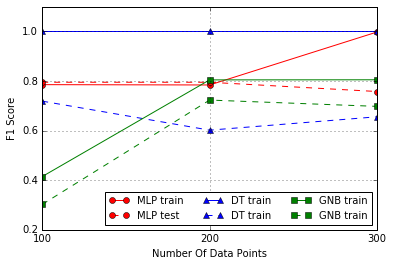

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

axes = plt.gca()
axes.set_ylim([0.2,1.1])
labels = ['100', '200', '300']
plt.grid(True)
x = [0, 1, 2]
plt.xticks(x, labels)

plt.plot(x, tabledf[tabledf.clf == 'MLPClassifier']['f1_train'], 'ro-', label='MLP train')
plt.plot(x, tabledf[tabledf.clf == 'MLPClassifier']['f1_test'], 'ro--', label='MLP test')

plt.plot(x, tabledf[tabledf.clf == 'DecisionTreeClassifier']['f1_train'], 'b^-', label='DT train')
plt.plot(x, tabledf[tabledf.clf == 'DecisionTreeClassifier']['f1_test'], 'b^--', label='DT train')

plt.plot(x, tabledf[tabledf.clf == 'GaussianNB']['f1_train'], 'gs-', label='GNB train')
plt.plot(x, tabledf[tabledf.clf == 'GaussianNB']['f1_test'], 'gs--', label='GNB train')

plt.legend(loc=0, ncol=3, fontsize=10)
plt.ylabel('F1 Score')
plt.xlabel('Number Of Data Points')
plt.show()

Given the F1 score comparison, for DT classifier has the best score for the training data set even though for the test data set, the score seems to be reducing. With this information and also taking into the time it took to run these datasets being the lowest, I am convince the DT classifier is the best choice for this problem.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. For example if you've chosen to use a decision tree or a support vector machine, how does the model go about making a prediction?*

**Answer: **
Decision tree algorithm divides all the data into separate datasets at each node of the tree until we reach the smallest number of records appear in the last nodes (leafs). As the name suggest this looks like a tree where the top we start with one node. At this point, we have all the records in this top node. Then we look at which attribute we can use to divide the data set to two different equal sets. This division is done looking at all the attributes in the dataset and picking the best attribute that split the dataset most reasonable way. We also call this attribute has the highest information gain. Now we have three nodes on the tree where the top one has all the data and both children inherit the top parent node has divided data. Now we can repeat this process by treating each child leaf as the top node and split the dataset into two separate sets using the best attribute at that level. As you can see if you keep doing this process recursively, we will end up with a tree that has many nodes. We can end this process when we reach the level where the bottom child nodes has predefined minimum amount of data. 

Once we build the tree using training data sets, we can use this tree on the real data where we need to make a prediction. As you can see this is a much clear process and the complexity and the knowledge of this tree are lying on how we calculate the information gain at each node.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [76]:
# TODO: Import 'gridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

def scoring_dtc(target, y_pred):
    return f1_score(target, y_pred, pos_label='yes')
# TODO: Create the parameters list you wish to tune

parameters = {
    'max_features':['auto', 'log2', 'sqrt'], 
    'max_depth':[1, 2, 3, 4, 5]}

# TODO: Initialize the classifier
clf = DecisionTreeClassifier()

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(scoring_dtc,greater_is_better=True)

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
ptrain_time_f, f1_train_f = predict_labels(clf, X_train, y_train)
ptest_time_f, f1_test_f = predict_labels(clf, X_test, y_test)

f1_train_new = list(tabledf[tabledf.clf == 'DecisionTreeClassifier']['f1_train']) + [f1_train_f]
f1_test_new = list(tabledf[tabledf.clf == 'DecisionTreeClassifier']['f1_test']) + [f1_test_f]

print "Tuned model has a training F1 score of {:.4f}.".format(f1_train_f)
print "Tuned model has a testing F1 score of {:.4f}.".format(f1_test_f)

Made predictions in 0.0002 seconds.
Made predictions in 0.0002 seconds.
Tuned model has a training F1 score of 0.8091.
Tuned model has a testing F1 score of 0.8000.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

- Training F1 Score: {{round(f1_train_f, 4)}}
- Testing F1 Score: {{round(f1_test_f, 4)}}

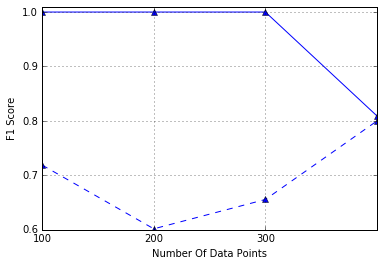

In [78]:
bestdf = pd.DataFrame()
axes = plt.gca()
axes.set_ylim([0.6,1.01])
labels = ['100', '200', '300']
plt.grid(True)
x = [0, 1, 2, 3]
plt.xticks(x, labels)
plt.plot(x, f1_train_new, 'b^-')
plt.plot(f1_test_new, 'b^--')
plt.legend(loc=0)
plt.ylabel('F1 Score')
plt.xlabel('Number Of Data Points')
plt.show()

The above plot show the final F1 value after picking the best parameters using grid search. the last data points on the plot are what the best DT classifier given to us compare to the 300 data points (x-axis)

**Answer: **

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.